In [5]:
%load_ext autoreload
%autoreload 2
import importlib

from finetune_vs_scratch.hate import load_datasets as load_hate
from finetune_vs_scratch.sentiment import load_datasets as load_sentiment
from finetune_vs_scratch.emotion import load_datasets as load_emotion
from finetune_vs_scratch.irony import load_datasets as load_irony
from finetune_vs_scratch.context_hate import load_datasets as load_context_hate
from finetune_vs_scratch.model import load_tokenizer

tasks = {
    "context_hate": load_context_hate,
    "hate": load_hate,
    "sentiment": load_sentiment,
    "emotion": load_emotion,
    "irony": load_irony,
}

tokenizers = {
    "beto_uncased" : load_tokenizer("dccuchile/bert-base-spanish-wwm-uncased", 128),
    "beto_cased" : load_tokenizer("dccuchile/bert-base-spanish-wwm-cased", 128),
    "roberta" : load_tokenizer("BSC-TeMU/roberta-base-bne", 128),
    "bertin" : load_tokenizer("bertin-project/bertin-roberta-base-spanish", 128),
    "robertuito_cased" : load_tokenizer("finiteautomata/robertuito-base-cased", 128),
    "robertuito_uncased" : load_tokenizer("finiteautomata/robertuito-base-uncased", 128),
    "robertuito_deacc" : load_tokenizer("finiteautomata/robertuito-base-deacc", 128),
}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd

df = pd.DataFrame()
for task, load_datasets in tasks.items():
    print(f"Task: {task}")
    splits = load_datasets()
    dataset = pd.concat([x.to_pandas() for x in splits])
    dataset["task"] = task.upper()
    df = pd.concat([df, dataset.loc[:, ["text", "task"]]])

Task: context_hate
Task: hate
Task: sentiment
Task: emotion
Task: irony


In [7]:
# Les resto 2 por los tokens iniciales y finales

args = {
    "truncation": True,
    "max_length": 128,
}

for tok_name, tokenizer in tokenizers.items():
    df[tok_name] = [sum(x) - 2 for x in tokenizer(list(df["text"].values), **args)["attention_mask"]]

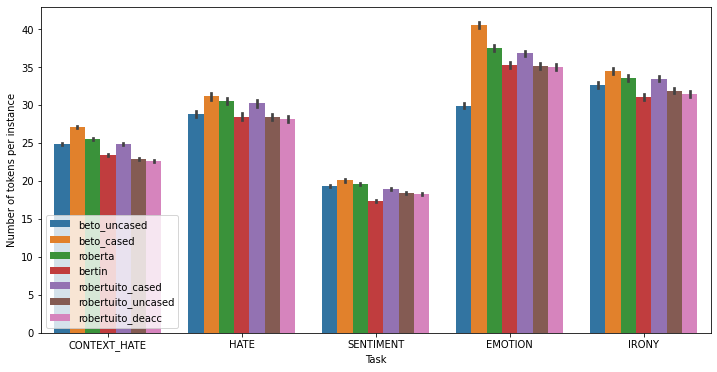

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

melted_df = df.melt(id_vars=["task"], value_vars=["beto_uncased", "beto_cased", "roberta", "bertin", "robertuito_cased", "robertuito_uncased", "robertuito_deacc"], var_name="tokenizer", value_name="length")

plt.figure(figsize=(12, 6))

sns.barplot(x="task", y="length", hue="tokenizer", data=melted_df, ci=95)

plt.xlabel("Task")
plt.ylabel("Number of tokens per instance")
plt.legend(loc="lower left")
plt.savefig("img/length_tokens_full.pdf", bbox_inches="tight")